### Character Segmentation
#### Theory

In this lab, we focus on character segmentation, a crucial step in Optical Character Recognition (OCR) systems. The process involves isolating individual characters from an image, enabling further analysis such as character recognition. The key steps include:

1. **Preprocessing the Image**: Converting the input image to grayscale and applying adaptive thresholding to create a binary image. This step enhances the contrast between the foreground (characters) and the background.

2. **Extracting Characters**: Using contour detection to identify regions of interest (ROIs) corresponding to individual characters. Bounding boxes are computed to isolate these regions.

3. **Visualization**: Displaying the original image alongside the segmented characters with bounding boxes to verify the accuracy of the segmentation process.

**Objectives**:
- Understand the preprocessing techniques required for character segmentation.
- Implement contour-based methods to extract individual characters.
- Visualize and validate the segmentation results.

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

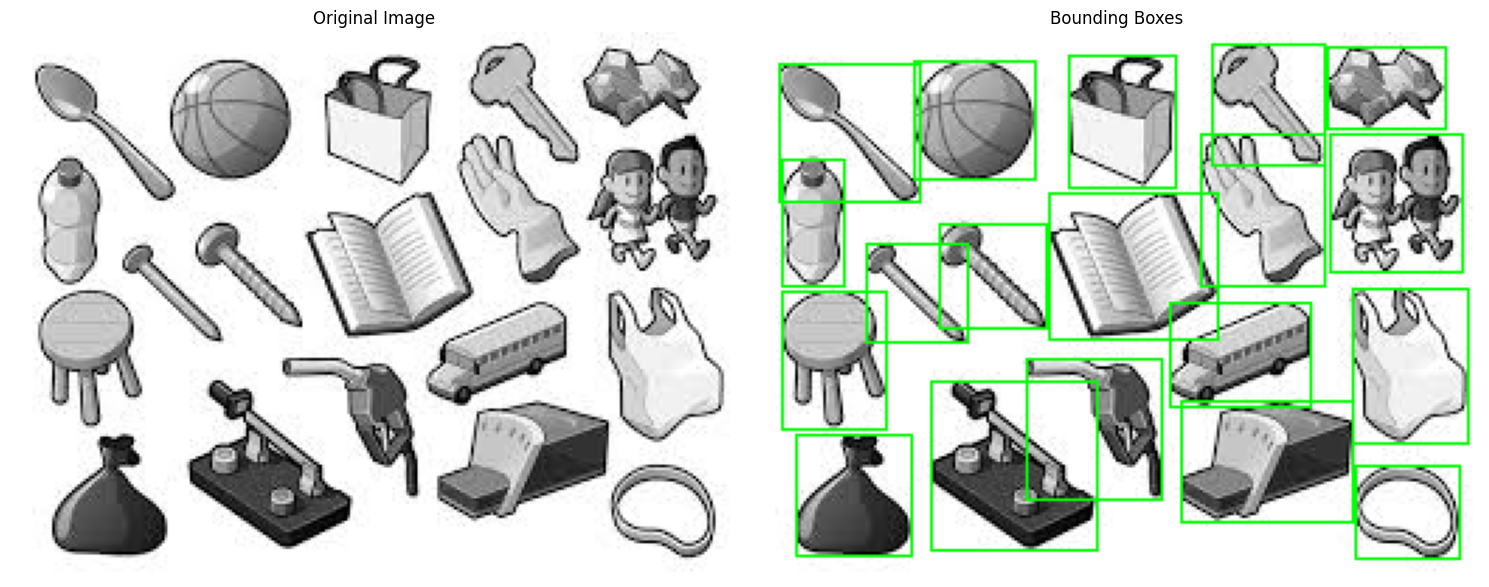

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

min_area = 100

img = cv2.imread("stdimgs/objects.jpeg", cv2.IMREAD_GRAYSCALE)

if img is None:
    print(f"Error: Could not load image")
else:
    gray = img.copy()

    binary = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 10
    )

    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

    contours, _ = cv2.findContours(
        binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    bounding_boxes = []
    characters = []

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        area = w * h
        if area > min_area:
            roi = binary[y : y + h, x : x + w]
            characters.append(roi)
            bounding_boxes.append((x, y, w, h))

    sorted_zipped_boxes_chars = sorted(zip(bounding_boxes, characters), key=lambda b: b[0][0])
    bounding_boxes = [box for box, char in sorted_zipped_boxes_chars]
    characters = [char for box, char in sorted_zipped_boxes_chars]

    plt.figure(figsize=(15, 10))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img, cmap="gray")
    plt.axis("off")

    segmented = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    for x, y, w, h in bounding_boxes:
        cv2.rectangle(segmented, (x, y), (x + w, y + h), (0, 255, 0), 1)

    plt.subplot(1, 2, 2)
    plt.title("Bounding Boxes")
    plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()